In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr

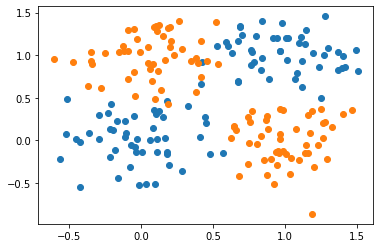

In [2]:
def gen_xor():
    """Generate XOR data."""
    nobs_per = 50

    X = np.vstack((
        np.random.randn(nobs_per, 2) * 0.25 + [[0, 0]],
        np.random.randn(nobs_per, 2) * 0.25 + [[1, 1]],
        np.random.randn(nobs_per, 2) * 0.25 + [[0, 1]],
        np.random.randn(nobs_per, 2) * 0.25 + [[1, 0]],
    ))
    Y = np.hstack((
        np.zeros((2 * nobs_per,)),
        np.ones((2 * nobs_per,)),
    ))
    return X, Y


"""Plot XOR data."""
X, Y = gen_xor()
for y in np.unique(Y):
    plt.plot(X[Y == y, 0], X[Y == y, 1], 'o')
plt.show()


In [3]:
X=torch.FloatTensor(X)
Y=torch.FloatTensor(Y)

In [4]:
input_nodes = 2
hidden_nodes = [4]
output_nodes = 1
nn_model = nn.Sequential(nn.Linear(input_nodes, hidden_nodes[0]),nn.ReLU(),
                         nn.Linear(hidden_nodes[0], output_nodes),nn.Sigmoid())
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(nn_model.parameters(), lr=0.01)

In [5]:
num_epochs = 10000
loss_curve = []
accuracy_curve = []
reshape_Y = Y.view(200,1)
for _ in range(num_epochs):
    optimizer.zero_grad()
    pred = nn_model(X)
    loss = criterion(pred.squeeze(), Y)
    loss_curve.append(loss.item())
    y_bool = (pred>=0.5).type(torch.uint8)
    y_corr = (y_bool==reshape_Y).type(torch.uint8)
    accuracy_curve.append(100.0*torch.sum(y_corr).item()/ len(y_corr))
    loss.backward()
    optimizer.step()

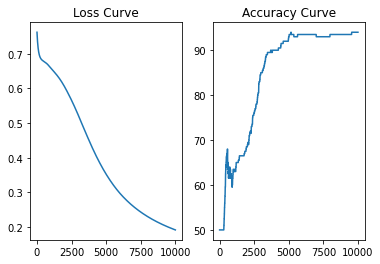

In [6]:
epoch_array = [i for i in range(num_epochs)]
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(epoch_array, loss_curve)
ax1.set_title('Loss Curve')
ax2.plot(epoch_array, accuracy_curve)
ax2.set_title('Accuracy Curve')
plt.show()

Predicted accuracy using model built using PyTorch: 94.0


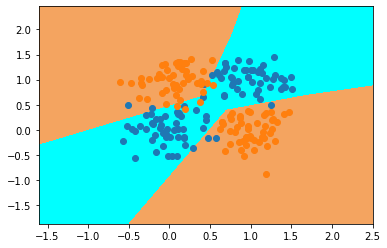

In [7]:
def plot_decision_boundary(X, Y, model, steps=5000, cmap='Paired'):
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    step_count = 1000
    x_span = np.linspace(x_min, x_max, step_count)
    y_span = np.linspace(y_min, y_max, step_count)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))

    # Plot decision boundary in region of interest
    z = (labels.detach().numpy()).reshape(xx.shape)
    cmap = clr.ListedColormap(['cyan', 'sandybrown'])
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z,cmap=cmap, alpha=1)

    # Get predicted labels on training data and plot
    for y in np.unique(Y):
        ax.plot(X[Y == y, 0], X[Y == y, 1], 'o')


    return fig, ax

X_np = X.numpy()
Y_np = Y.numpy()
plot_decision_boundary(X_np, Y_np, nn_model, steps=5000, cmap='Paired')

print('Predicted accuracy using model built using PyTorch:', accuracy_curve[-1])

In [8]:
# Weights learnt
w_1 = nn_model[0].weight.data.numpy()
w_2 = nn_model[2].weight.data.numpy()
b_1 = nn_model[0].bias.data.numpy()
b_2 = nn_model[2].bias.data.numpy()

# Feed-forward neural network using learnt weights
activation = np.dot(w_1, np.transpose(X_np)) + np.reshape(b_1,(4,1))
relu_activation = np.maximum(0,activation)
activation = np.dot(w_2, relu_activation) + np.reshape(b_2, (1,1))
sig_activation = 1/(1+np.exp(-activation))
pred_output = sig_activation
for i in range(pred_output[0].shape[0]):
    if(pred_output[0,i]>=0.5):
        pred_output[0,i] = 1
    else:
        pred_output[0,i] = 0
pred_accuracy = (Y_np==pred_output).mean()*100
print('Predicted accuracv using model built from scratch: ', pred_accuracy)

Predicted accuracv using model built from scratch:  94.0
